In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statistics

# cleaning dataframe
df = pd.read_excel("lichen_moss_data.xlsx", sheet_name=None)
df_height = df['HEIGHT']
df_aspect = df['ASPECT']
df_clean = df["CLEANED"]

In [3]:
df_height
df_height = df_height.drop(columns=["Data Collector 1", "Data Collector 2", "Name on Stone.1", "Name on Stone", 
                                    "Dates on Stone", "Unnamed: 13", "Data Collector 1.1", "Dates on Stone.1", 
                                    "Data Collector 2.1", "Aspect.1", "Height.1", "Height", "Surface Texture.1"])
#df_height["Height"] = [int(i[0]) for i in df_height["Height"]]

def convert(value):
    if value == "nd":
        return None
    return float(value)

for col in df_height.columns:
    if col != "Aspect":
        df_height[col] = [convert(i) for i in df_height[col]]

df_height

,Surface Texture,Aspect,0m%Lichen,0m#Lichens,0m#Apothecia,0m%Moss,0m#Mosses,0m#Sporophytes,0.5m%Lichen,0.5m#Lichens,0.5m#Apothecia,0.5m%Moss,0.5m#Mosses,0.5m#Sporophytes
0,4.0,N,0.0,0.0,5.0,90.0,1.0,0.0,25.0,3.0,0.0,11.0,2.0,1.0
1,5.0,S,0.0,0.0,0.0,15.0,3.0,1.0,30.0,3.0,0.0,0.0,0.0,0.0
2,1.0,N,37.0,1.0,63.0,1.0,1.0,0.0,97.0,3.0,125.0,1.0,1.0,0.0
3,1.0,S,40.0,2.0,46.0,0.0,0.0,0.0,100.0,2.0,137.0,0.0,0.0,0.0
4,5.0,N,0.0,0.0,0.0,68.0,1.0,10.0,30.0,2.0,110.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2.0,S,47.0,1.0,16.0,0.0,0.0,0.0,96.0,2.0,32.0,0.0,0.0,0.0
510,3.0,N,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,3.0,S,42.0,1.0,40.0,0.0,0.0,0.0,36.0,1.0,80.0,0.0,0.0,0.0
512,3.0,N,88.0,2.0,0.0,12.0,1.0,0.0,100.0,1.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Treatment')

<Figure size 800x600 with 0 Axes>

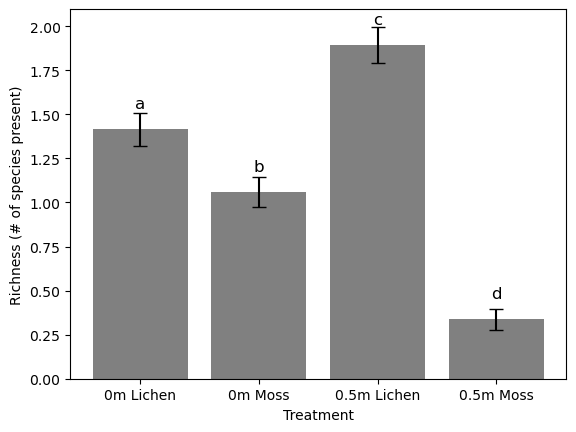

In [4]:
categories = ["0m#Lichens", "0m#Mosses", "0.5m#Lichens", "0.5m#Mosses"]
means = []
std = []
for col in categories:
    a = df_height[col].dropna()
    means.append(np.mean(a))
    std.append(np.std(a, ddof=1)/(np.sqrt(len(a)))*1.96)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
bars = plt.bar(categories, means, yerr=std, capsize=5, color=['gray', 'gray', 'gray', 'gray'])


labels = ['a', 'b', 'c', 'd']
# Add labels above the bars
for bar, label in zip(bars, labels):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, label, 
            ha='center', va='bottom', fontsize=12)
plt.xticks(ticks=range(len(categories)), labels=["0m Lichen", "0m Moss", "0.5m Lichen", "0.5m Moss"])
plt.ylabel("Richness (# of species present)")
plt.xlabel("Treatment")

In [5]:
means, std

([1.415686274509804, 1.0588235294117647, 1.89453125, 0.337890625],
 [0.09263585224128809,
  0.08500151721798414,
  0.10269871062095344,
  0.05893420851553835])

In [6]:
for i in range(4):#col in df_aspect2.columns:
    a = df_height[categories[i]].dropna()
    b = df_height[categories[3-i]].dropna()
    if len(a) < len(b):
        b = b.iloc[:len(a)].reset_index(drop=True)
    elif len(a) > len(b):
        a = a.iloc[:len(b)].reset_index(drop=True)
    #t_stat, p_value = stats.ttest_ind(a, b)
    #print("first", t_stat, p_value, "between", df_aspect2.columns[i], df_aspect2.columns[3-i])
    t_stat, p_value = stats.ttest_rel(a, b)
    print(t_stat, p_value, "between", categories[i], categories[3-i])

19.247016285169323 1.9641905459070414e-62 between 0m#Lichens 0.5m#Mosses
-12.308272389128096 1.1706130541726354e-30 between 0m#Mosses 0.5m#Lichens
12.308272389128096 1.1706130541726354e-30 between 0.5m#Lichens 0m#Mosses
-19.247016285169323 1.9641905459070414e-62 between 0.5m#Mosses 0m#Lichens


Text(0.5, 0, 'Treatment')

<Figure size 800x600 with 0 Axes>

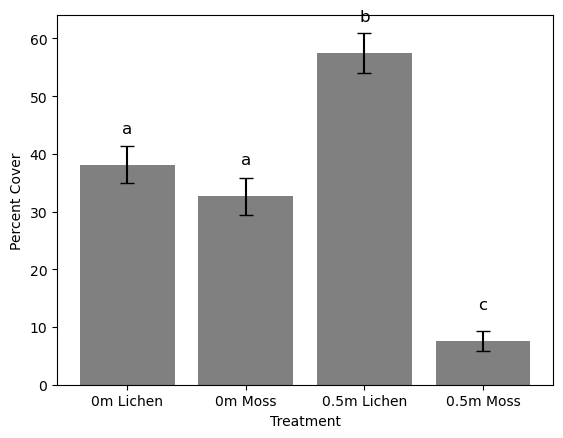

In [7]:
categories = ["0m%Lichen", "0m%Moss", "0.5m%Lichen", "0.5m%Moss"]
means = []
std = []
for col in categories:
    a = df_height[col].dropna()
    means.append(np.mean(a))
    std.append(np.std(a, ddof=1)/(np.sqrt(len(a)))*1.96)
plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()
bars = plt.bar(categories, means, yerr=std, capsize=5, color=['gray', 'gray', 'gray', 'gray'])

labels = ['a', 'a', 'b', 'c']
# Add labels above the bars
for bar, label in zip(bars, labels):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, label, 
            ha='center', va='bottom', fontsize=12)

plt.xticks(ticks=range(len(categories)), labels=["0m Lichen", "0m Moss", "0.5m Lichen", "0.5m Moss"])
plt.ylabel("Percent Cover")
plt.xlabel("Treatment")

In [8]:
for i in range(4):#col in df_aspect2.columns:
    a = df_height[categories[i]].dropna()
    b = df_height[categories[3-i]].dropna()
    if len(a) < len(b):
        b = b.iloc[:len(a)].reset_index(drop=True)
    elif len(a) > len(b):
        a = a.iloc[:len(b)].reset_index(drop=True)
    #t_stat, p_value = stats.ttest_ind(a, b)
    #print("first", t_stat, p_value, "between", df_aspect2.columns[i], df_aspect2.columns[3-i])
    t_stat, p_value = stats.ttest_rel(a, b)
    print(t_stat, p_value, "between", categories[i], categories[3-i])

a = df_height["0m%Lichen"].dropna()
b = df_height["0.5m%Lichen"].dropna()
if len(a) < len(b):
    b = b.iloc[:len(a)].reset_index(drop=True)
elif len(a) > len(b):
    a = a.iloc[:len(b)].reset_index(drop=True)
t_stat, p_value = stats.ttest_rel(a, b)
print(t_stat, p_value)

15.711966084891271 1.2165045288670634e-45 between 0m%Lichen 0.5m%Moss
-10.140955321818467 3.9086047559112134e-22 between 0m%Moss 0.5m%Lichen
10.140955321818467 3.9086047559112134e-22 between 0.5m%Lichen 0m%Moss
-15.711966084891271 1.2165045288670634e-45 between 0.5m%Moss 0m%Lichen
-7.8478613700933835 2.514214778452615e-14


In [9]:
'''categories = ["0m%Lichen", "0m%Moss", "0.5m%Lichen", "0.5m%Moss"]
means = []
std = []
for col in categories:
    means.append(np.mean(df_height[col]))
    std.append(np.std(df_height[col]))
plt.figure(figsize=(8, 6))
plt.bar(categories, means, yerr=std, capsize=5, color=['blue', 'green', 'blue', 'green'])'''

'categories = ["0m%Lichen", "0m%Moss", "0.5m%Lichen", "0.5m%Moss"]\nmeans = []\nstd = []\nfor col in categories:\n    means.append(np.mean(df_height[col]))\n    std.append(np.std(df_height[col]))\nplt.figure(figsize=(8, 6))\nplt.bar(categories, means, yerr=std, capsize=5, color=[\'blue\', \'green\', \'blue\', \'green\'])'

In [10]:
df_aspect.columns

Index(['Data Collector 1', 'Data Collector 2', 'Name on Stone',
       'Dates on Stone', 'Surface Texture', 'Height', 'Aspect', 'N%Lichen',
       'N#Lichens', 'N#Apothecia ', 'N%Moss', 'N#Mosses', 'N#Sporophytes ',
       'Unnamed: 13', 'Data Collector 1.1', 'Data Collector 2.1',
       'Name on Stone.1', 'Dates on Stone.1', 'Surface Texture.1', 'Height.1',
       'Aspect.1', 'S%Lichen', 'S#Lichens', 'S#Apothecia ', 'S%Moss',
       'S#Mosses', 'S#Sporophytes '],
      dtype='object')

/var/folders/gz/wbvdwhws46d1kjxt_rfffkc00000gn/T/ipykernel_20955/2947914167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aspect12[col] = [float(i) if i!= "nd" else None for i in df_aspect12[col]]


Text(0.5, 0, 'Treatment')

<Figure size 800x600 with 0 Axes>

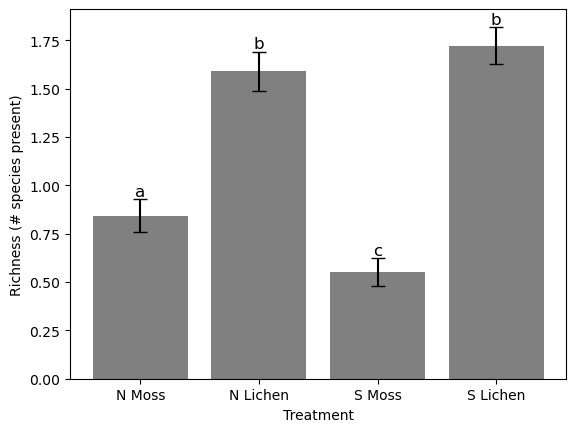

In [11]:
df_aspect12 = df_aspect[["N#Mosses", "N#Lichens", "S#Mosses", "S#Lichens"]]

means = []
std = []
for col in df_aspect12.columns:
    df_aspect12[col] = [float(i) if i!= "nd" else None for i in df_aspect12[col]]
    a = df_aspect12[col].dropna()
    means.append(np.mean(a))
    std.append(np.std(a, ddof=1)/(np.sqrt(len(a)))*1.96)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
bars = plt.bar(df_aspect12.columns, means, yerr=std, capsize=5, color=['gray', 'gray', 'gray', 'gray'])
labels = ['a', 'b', 'c', 'b']

# Add labels above the bars
for bar, label, err in zip(bars, labels, std):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + err, label, 
            ha='center', va='bottom', fontsize=12)
    
plt.xticks(ticks=range(4), labels=["N Moss", "N Lichen", "S Moss", "S Lichen"])
plt.ylabel("Richness (# species present)")
plt.xlabel("Treatment")

In [12]:
means, std

([0.8434442270058709,
  1.5890410958904109,
  0.5518590998043053,
  1.7221135029354206],
 [0.08580599762004336,
  0.10228160084846181,
  0.07041624501614413,
  0.09732191756719868])

/var/folders/gz/wbvdwhws46d1kjxt_rfffkc00000gn/T/ipykernel_20955/1353939550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aspect1[col] = [float(i) if i!= "nd" else None for i in df_aspect1[col]]


<Figure size 800x600 with 0 Axes>

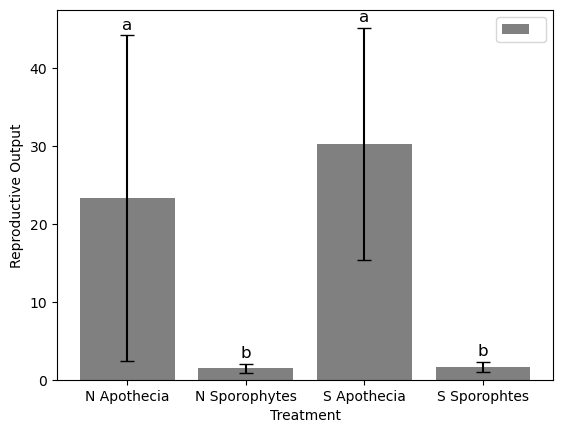

In [13]:
df_aspect1 = df_aspect[["N#Apothecia ", "N#Sporophytes ", "S#Apothecia ", "S#Sporophytes "]]

means = []
std = []
for col in df_aspect1.columns:
    df_aspect1[col] = [float(i) if i!= "nd" else None for i in df_aspect1[col]]
    a = df_aspect1[col].dropna()
    means.append(np.mean(a))
    std.append(np.std(a, ddof=1)/(np.sqrt(len(a)))*1.96)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
bars = plt.bar(df_aspect1.columns, means, yerr=std, capsize=5, color=['gray', 'gray', 'gray', 'gray'])
labels = ['a', 'b', 'a', 'b']

# Add labels above the bars
for bar, label, err in zip(bars, labels, std):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + err + 0.4, label, 
            ha='center', va='bottom', fontsize=12)
    
plt.xticks(ticks=range(4), labels=["N Apothecia", "N Sporophytes", "S Apothecia", "S Sporophtes"])
plt.ylabel("Reproductive Output")
plt.xlabel("Treatment")
plt.legend([""])

In [14]:
means, std

([23.30648330058939, 1.446183953033268, 30.24015748031496, 1.6066536203522506],
 [20.862938501925886,
  0.5876410228609844,
  14.91654990578392,
  0.6607957833002649])

In [15]:
a = df_aspect1["N#Sporophytes "].dropna()
b = df_aspect1["S#Sporophytes "].dropna()
if len(a) < len(b):
    b = b.iloc[:len(a)].reset_index(drop=True)
elif len(a) > len(b):
    a = a.iloc[:len(b)].reset_index(drop=True)
    #t_stat, p_value = stats.ttest_ind(a, b)
    #print("first", t_stat, p_value, "between", df_aspect2.columns[i], df_aspect2.columns[3-i])
t_stat, p_value = stats.ttest_rel(a, b)
print(t_stat, p_value, "between", df_aspect1.columns[i], df_aspect1.columns[3-i])

-0.3580906931956377 0.7204236058422528 between S#Sporophytes  N#Apothecia 


/var/folders/gz/wbvdwhws46d1kjxt_rfffkc00000gn/T/ipykernel_20955/2920089414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aspect2[col] = [float(i) if i!= "nd" else None for i in df_aspect2[col]]


Text(0.5, 0, 'Treatment')

<Figure size 800x600 with 0 Axes>

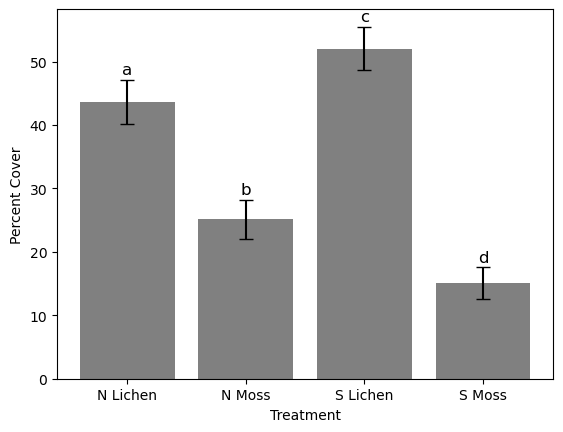

In [16]:
df_aspect2 = df_aspect[['N%Lichen', 'N%Moss', 'S%Lichen', 'S%Moss']]
means = []
std = []
for col in df_aspect2.columns:
    df_aspect2[col] = [float(i) if i!= "nd" else None for i in df_aspect2[col]]
    a = df_aspect2[col].dropna()
    means.append(np.mean(a))
    std.append(np.std(a, ddof=1)/(np.sqrt(len(a)))*1.96)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
bars = plt.bar(df_aspect2.columns, means, yerr=std, capsize=5, color=['gray', 'gray', 'gray', 'gray'])
labels = ['a', 'b', 'c', 'd']

for bar, label, err in zip(bars, labels, std):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + err + 0.4, label, 
            ha='center', va='bottom', fontsize=12)

plt.xticks(ticks=range(4), labels=["N Lichen", "N Moss", "S Lichen", "S Moss"])
plt.ylabel("Percent Cover")
plt.xlabel("Treatment")

In [17]:
a = df_aspect2["N%Moss"].dropna()
b = df_aspect2["S%Moss"].dropna()
    #t_stat, p_value = stats.ttest_ind(a, b)
    #print("first", t_stat, p_value, "between", df_aspect2.columns[i], df_aspect2.columns[3-i])
t_stat, p_value = stats.ttest_rel(a, b)
print(t_stat, p_value)

4.992042505662686 8.213908466435814e-07


In [18]:
for i in range(4):#col in df_aspect2.columns:
    a = df_aspect2[df_aspect2.columns[i]].dropna()
    b = df_aspect2[df_aspect2.columns[3-i]].dropna()
    #t_stat, p_value = stats.ttest_ind(a, b)
    #print("first", t_stat, p_value, "between", df_aspect2.columns[i], df_aspect2.columns[3-i])
    t_stat, p_value = stats.ttest_rel(a, b)
    print(t_stat, p_value, "between", df_aspect2.columns[i], df_aspect2.columns[3-i])

13.560772872675146 5.426746370893513e-36 between N%Lichen S%Moss
-12.433597163845963 3.469934226462133e-31 between N%Moss S%Lichen
12.433597163845963 3.469934226462133e-31 between S%Lichen N%Moss
-13.560772872675146 5.426746370893513e-36 between S%Moss N%Lichen
